In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat
plt.rcParams['figure.figsize'] = [7, 4]
plt.rcParams['figure.dpi'] = 100 
g = -9.8

In [2]:
dim_state = 6
dim_mmt = 2
dim_mmt_d = 4

x = np.zeros([dim_state, 1])
A = np.zeros([dim_state, dim_state], dtype=float)

A[0][0] = 0.9
A[1][1] = 0.9
A[2][2] = 0.9
A[0][2] = 0.3
A[1][3] = 0.3

In [3]:
# dim_state = 12
# dim_mmt = 6
# dim_mmt_d = 6

# x = np.zeros([dim_state, 1])
# A = np.zeros([dim_state, dim_state], dtype=float)

# A[0,3] = 1
# A[1,4] = 1
# A[2,5] = 1
# A[3,7] = -g
# A[4,6] = g
# A[5,8] = 0
# A[6,9] = 1
# A[7,10] = 1
# A[8,11] = 1

In [4]:
V = np.identity(dim_state)*200
W = np.identity(dim_mmt)*4000
W_d = np.identity(dim_mmt_d)*2000

In [5]:
C_d = np.block([np.identity(dim_mmt_d), np.zeros([dim_mmt_d, dim_mmt])])
C = np.block([np.zeros([dim_mmt, dim_mmt_d]), np.identity(dim_mmt)])
Gamma = np.identity(dim_mmt_d)
C_d[2][2] = 0.0
C[1][1] = 0.0

In [22]:
N = 5
duration = 30

x_bar = np.zeros([dim_state, 1])
x_hat = A @ x
P = np.identity(dim_state)*2000.0
M = np.identity(dim_state)

v = stat.multivariate_normal(cov=V)
w = stat.multivariate_normal(cov=W)
w_d = stat.multivariate_normal(cov=W_d)

x_vals = []
y_vals = []
for k in range(duration):
    K = P @ C.T @ np.linalg.inv(W + C @ P @ C.T)
    F = np.identity(dim_state) - K@C
    M = F@P@F.T + K@W@K.T
    P = A@M@A.T + V
    
    x = A@x + v.rvs()
    y = C@x + w.rvs()
    x_hat = A@x_hat + K@(y - C@A@x_hat)
    
    if not k%N:
        x_vals.append(k)
        y_vals.append(np.trace(M))
        
        y_d = C_d @ x + w_d.rvs()
        x_hat = x_hat + K_d @ (y_d - C@x_hat)
        a = np.zeros([dim_mmt_d, 1])
        
        K_d = M @ C_d.T @ np.linalg.inv(W_d + C_d @ M @ C_d.T)
        F_d = np.identity(dim_state) - K_d @ C_d
        M = F_d @ M @ F_d.T + K_d @ W_d @ K_d.T \
        + K_d @ Gamma @ a @ a.T @ Gamma.T @K_d.T
    
    P = A@M@A.T + V
    x_vals.append(k)
    y_vals.append(np.trace(M))

AttributeError: 'float' object has no attribute 'rvs'

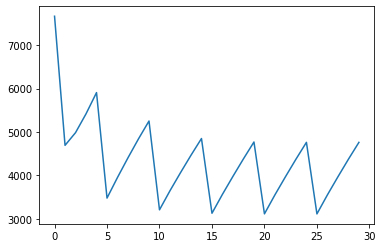

In [7]:
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d
plt.plot(y_vals)

x_vals_lenv = []
y_vals_lenv = []
x_vals_uenv = [0]
y_vals_uenv = [0]
for k in range(duration):
    if not k%N:
        x_vals_lenv.append(k)
        y_vals_lenv.append(y_vals[k])
        if k>0:
            x_vals_uenv.append(k-1)
            y_vals_uenv.append(y_vals[k-1])

uenvelope = interp1d(x_vals_uenv, y_vals_uenv, kind="quadratic")
lenvelope = interp1d(x_vals_lenv, y_vals_lenv, kind="quadratic")
x_vals_interp_lenv = np.linspace(0, x_vals_lenv[-1], num=200)
x_vals_interp_uenv = np.linspace(0, x_vals_uenv[-1], num=200)
#plt.plot(x_vals_interp_lenv, lenvelope(x_vals_interp_lenv), '--')
#plt.plot(x_vals_interp_uenv, uenvelope(x_vals_interp_uenv), '--')
plt.show()

In [8]:
interp1d

scipy.interpolate.interpolate.interp1d

In [9]:
np.linalg.eig(A)[0]

array([0.9, 0.9, 0.9, 0. , 0. , 0. ])

array([-12.35174402, -51.62668761])